## Figure 8: right

Interpolation upsamplers introduce filtering artifacts, not tonal artifacts, after initialization. 

This experiment only employs linear interpolation layers, without the interleaved (learnable) convolutions. This figure is used as reference to discuss the spectral replicas of filtering artifacts.

Inputs are 4kHz signals: ones, music, or white noise.

In [1]:
sr = 4000
signal = 'random' # 'ones' or 'music' or 'random'
use_bias = True
upsampling = 'linear' # 'nearest' or 'linear', set to 'linear' to reproduce Fig.8 (right)

In [2]:
# Importing libraries..
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import rcParams
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({'font.size': 80})
plt.rcParams["figure.figsize"] = (18,12)

import librosa
import librosa.display

import torch
import torch.nn
import torch.nn.functional as F

import warnings
warnings.filterwarnings("ignore")

import IPython.display as ipd

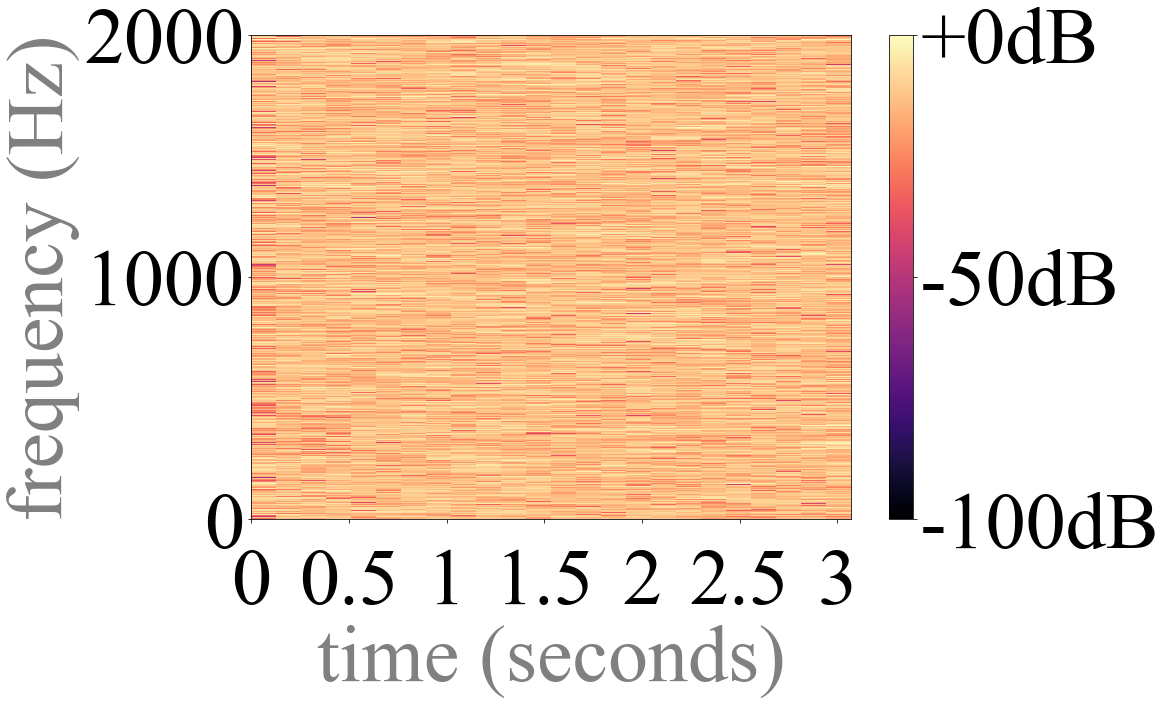

In [3]:
if signal == 'ones':
    # ones input signal: is an empty spectra that allows nice visualizations
    x = torch.ones(sr*3)*3
    np_x = x.detach().numpy()
elif signal == 'music':
    # music input signal: to use a variate real signal for testing
    np_x, sr = librosa.load(librosa.util.example_audio_file(), sr=sr)
    np_x = np_x[sr*6:sr*9]
    x = torch.tensor(np_x)
elif signal == 'random':
    # random input signal: to use a white noise signal for testing
    x = torch.rand(sr*3)*2-1
    np_x = x.detach().numpy()    

ax = plt.subplot(1,1,1)
ax.tick_params(axis='x', which='major', pad=25)
X = librosa.stft(np_x)
ref=np.max(np.abs(X))
librosa.display.specshow(20*np.log10(np.abs(X)/ref), sr=sr, y_axis='linear', x_axis='time', vmin=-100, vmax=0)
plt.xticks(np.arange(0,3.5,0.5))
plt.colorbar(format='%+2.fdB')
plt.xlabel('time (seconds)', color="gray")
plt.ylabel('frequency (Hz)', color="gray")
plt.tight_layout()
plt.savefig('PNGs/Fig8r_signal.png')

ipd.Audio(x, rate=sr)

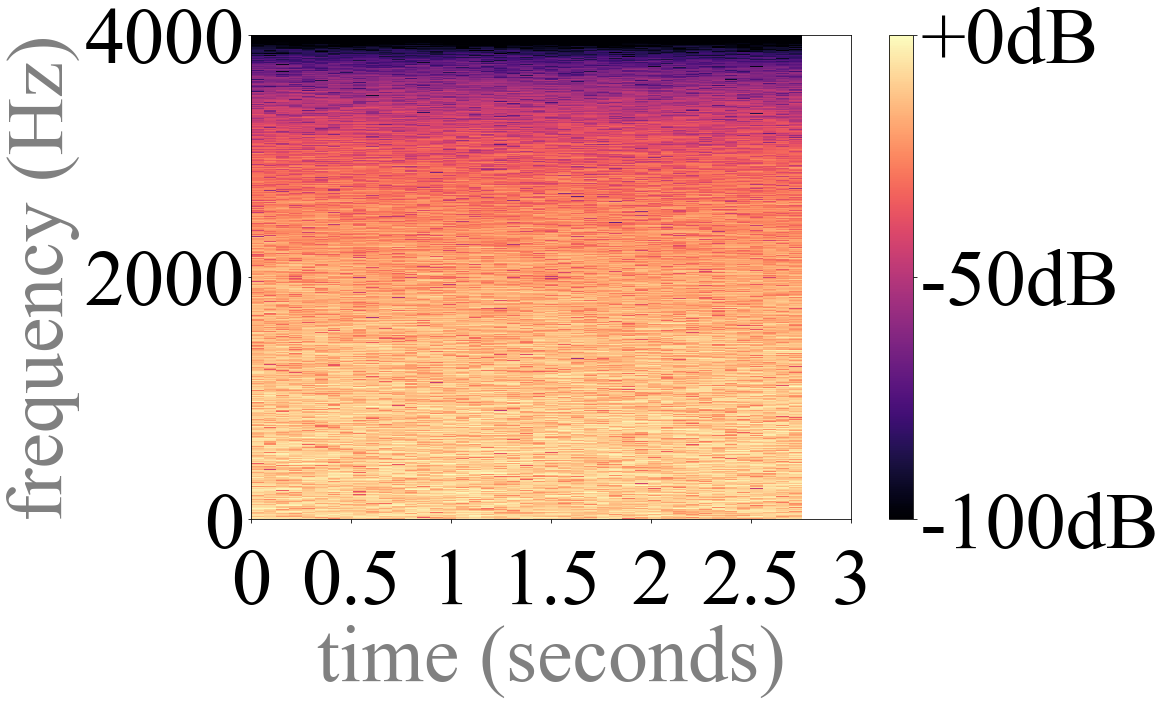

In [4]:
# Let's upsample the signal with more than one interpolation layer!
# IMPORTANT: differently from Fig.6, we do not use a learnable convolution after upsampling.

up = torch.nn.Upsample(scale_factor=2, mode=upsampling)
y = up(x.view(1,1,-1))

np_y = np.squeeze(y.detach().numpy())
Y = librosa.stft(np_y, center=False) # center=False to avoid measuring boundary artifacts due to STFT
ax = plt.subplot(1,1,1)
ax.tick_params(axis='x', which='major', pad=25)
# sr=sr*2 because the signal has been upsampled by two
librosa.display.specshow(20*np.log10(np.abs(Y)/ref), sr=sr*2, y_axis='linear', x_axis='time', vmin=-100, vmax=0)
plt.colorbar(format='%+2.fdB')
plt.xticks(np.arange(0,3.5,.5))
plt.xlabel('time (seconds)', color="gray")
plt.ylabel('frequency (Hz)', color="gray")
plt.tight_layout()
plt.savefig('PNGs/Fig8r_1.png')

ipd.Audio(np_y, rate=sr*2) # sr=sr*2 because the signal has been upsampled by two

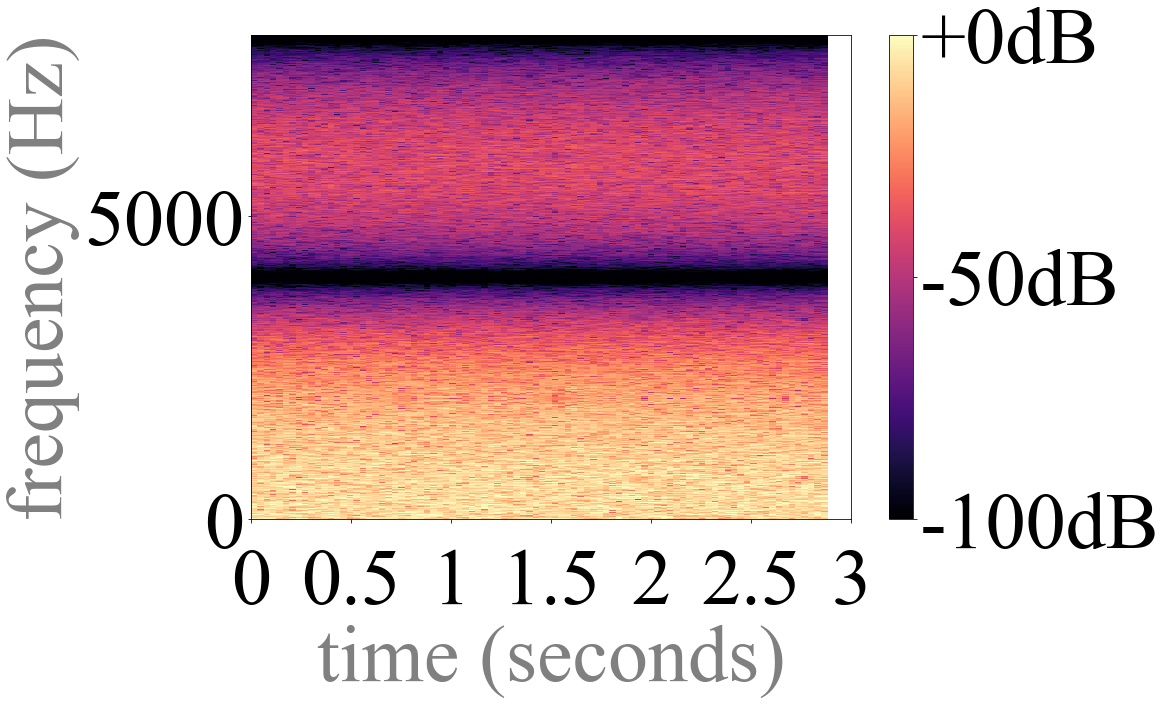

In [5]:
# Let's upsample the signal with more than one interpolation layer!
# IMPORTANT: differently from Fig.6, we do not use a learnable convolution after upsampling.

y = up(y)

np_y = np.squeeze(y.detach().numpy())
Y = librosa.stft(np_y, center=False) # center=False to avoid measuring boundary artifacts due to STFT
ax = plt.subplot(1,1,1)
ax.tick_params(axis='x', which='major', pad=25)
# sr=sr*2*2 because the signal has been upsampled two times (by a factor of two)
librosa.display.specshow(20*np.log10(np.abs(Y)/ref), sr=sr*2*2, y_axis='linear', x_axis='time', vmin=-100, vmax=0)
plt.colorbar(format='%+2.fdB')
plt.xticks(np.arange(0,3.5,.5))
plt.xlabel('time (seconds)', color="gray")
plt.ylabel('frequency (Hz)', color="gray")
plt.tight_layout()
plt.savefig('PNGs/Fig8r_2.png')

ipd.Audio(np_y, rate=sr*2*2) # sr=sr*2*2 because the signal has been upsampled two times (by a factor of two)

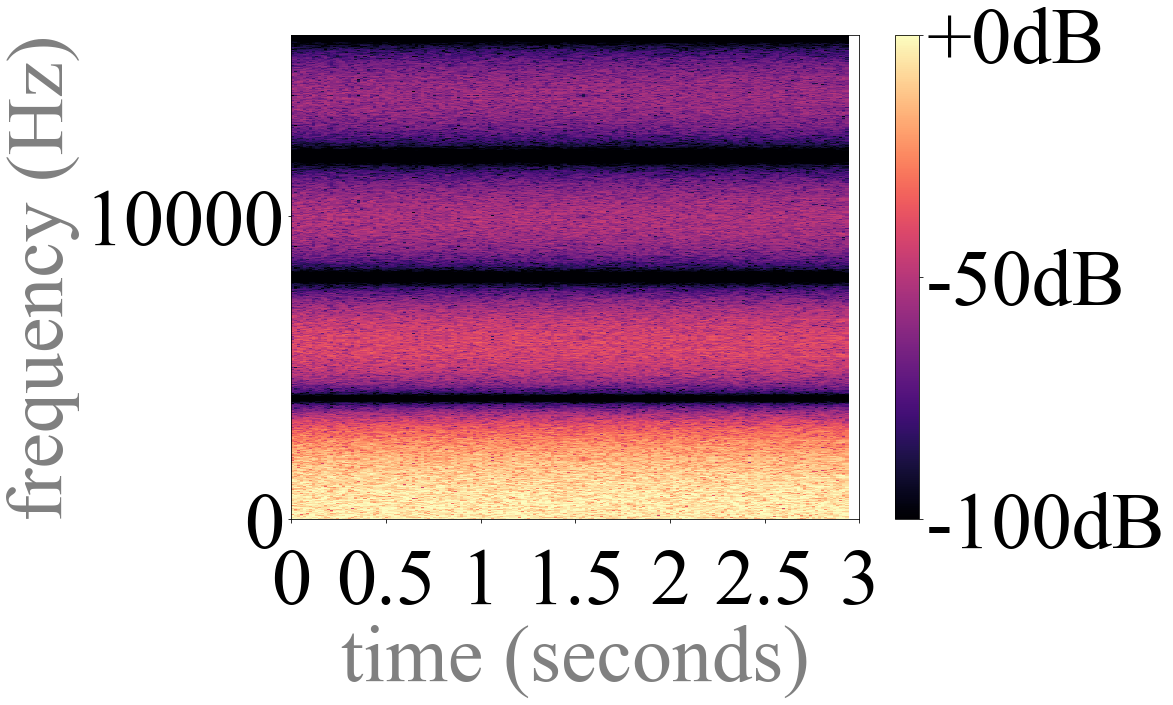

In [6]:
# Let's upsample the signal with more than one interpolation layer!
# IMPORTANT: differently from Fig.6, we do not use a learnable convolution after upsampling.

y = up(y)

np_y = np.squeeze(y.detach().numpy())
Y = librosa.stft(np_y, center=False) # center=False to avoid measuring boundary artifacts due to STFT
ax = plt.subplot(1,1,1)
ax.tick_params(axis='x', which='major', pad=25)
# sr=sr*2*2*2 because the signal has been upsampled three times (by a factor of two)
librosa.display.specshow(20*np.log10(np.abs(Y)/ref), sr=sr*2*2*2, y_axis='linear', x_axis='time', vmin=-100, vmax=0)
plt.colorbar(format='%+2.fdB')
plt.xticks(np.arange(0,3.5,.5))
plt.xlabel('time (seconds)', color="gray")
plt.ylabel('frequency (Hz)', color="gray")
plt.tight_layout()
plt.savefig('PNGs/Fig8r_3.png')

ipd.Audio(np_y, rate=sr*2*2*2) # sr=sr*2*2*2 because the signal has been upsampled three times (by a factor of two)